# -----------------------------------------------------------------------------------
# Unrelated to the Paper on Predicting Price Trends in Ethereum!
# -----------------------------------------------------------------------------------

In [61]:
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

In [2]:
dataset = pd.read_csv('ethereum_trainval_dataset.csv')
dataset = dataset.reindex(index = dataset.index[::-1])
print(dataset.columns)

Index(['Unnamed: 0', 'UnixTimeStamp', 'eth_etherprice', 'eth_tx',
       'eth_address', 'eth_supply', 'eth_marketcap', 'eth_hashrate',
       'eth_difficulty', 'eth_blocks', 'eth_uncles', 'eth_blocksize',
       'eth_blocktime', 'eth_gasprice', 'eth_gaslimit', 'eth_gasused',
       'eth_ethersupply', 'eth_ens_register'],
      dtype='object')


In [81]:
def sigmoid(p, v, t, h):
    return p / (1 + np.exp(-v * (t-h)))

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)
def quadratic(a, b, c, t):
    return a + b*t + c*np.square(t) 
# last one = 800

In [68]:
dataset["t"] = np.arange(0,len(dataset),1)
results = smf.ols('eth_tx ~ t + np.square(t)', data=dataset).fit()

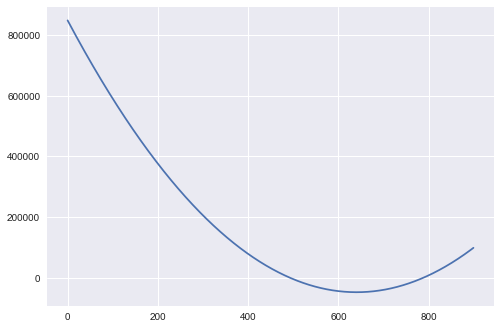

In [88]:
l = [quadratic(results.params[0], results.params[1], results.params[2], t) for t in range(0,900)]
plt.plot(np.array(l))
plt.show()

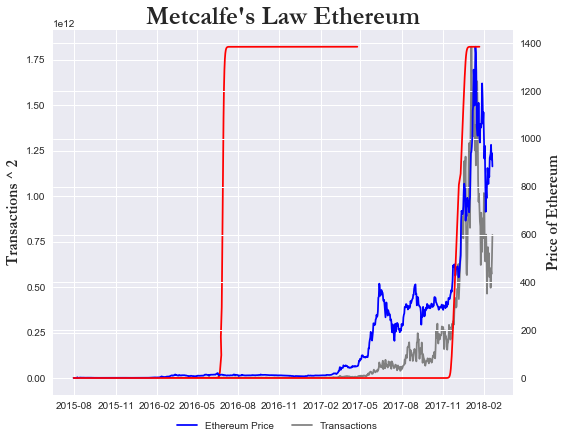

In [87]:
dateconv = np.vectorize(dt.datetime.fromtimestamp)
date = dateconv(dataset.UnixTimeStamp)

hfont = {'fontname':'Garamond'}
plt.style.use("seaborn")

fig, ax1 = plt.subplots()

ax1.plot(date, dataset["eth_tx"]**2, label = "Transactions", color = "gray")
ax1.set_ylabel("Transactions ^ 2", size = 15, fontweight='bold', **hfont)
ax1.plot(date[299:], [sigmoid((dataset["eth_tx"]**2).max(), 
                         -0.65, 
                         t, 
                         600) 
                         for t in np.arange(0,len(date),1)][299:], color = "red")

box = ax1.get_position()
ax1.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

ax2 = ax1.twinx()

ax2.plot(date, dataset["eth_etherprice"], label = "Ethereum Price", color = "blue")
ax2.set_ylabel("Price of Ethereum", size = 15, fontweight='bold', **hfont)

ax2.plot(date[29:], running_mean([sigmoid((dataset["eth_etherprice"]).max(), 
                                     -0.65, 
                                     t, 
                                     60) 
                                     for t in np.arange(0,len(date),1)], 30), color = "red")
box = ax2.get_position()
ax2.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

ax1.legend(loc=2, bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=2)

ax2.legend(loc=0, bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=2)

plt.tight_layout()
plt.title("Metcalfe's Law Ethereum", size = 25, fontweight='bold', **hfont)
plt.savefig("Metcalfe's Law Ethereum.png", facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()
    

In [13]:
df = pd.read_csv("bitcoin_dataset.csv", index_col = "Date")

In [40]:
df.columns

Index(['btc_market_price', 'btc_total_bitcoins', 'btc_market_cap',
       'btc_trade_volume', 'btc_blocks_size', 'btc_avg_block_size',
       'btc_n_orphaned_blocks', 'btc_n_transactions_per_block',
       'btc_median_confirmation_time', 'btc_hash_rate', 'btc_difficulty',
       'btc_miners_revenue', 'btc_transaction_fees',
       'btc_cost_per_transaction_percent', 'btc_cost_per_transaction',
       'btc_n_unique_addresses', 'btc_n_transactions',
       'btc_n_transactions_total', 'btc_n_transactions_excluding_popular',
       'btc_n_transactions_excluding_chains_longer_than_100',
       'btc_output_volume', 'btc_estimated_transaction_volume',
       'btc_estimated_transaction_volume_usd'],
      dtype='object')

In [27]:
df.index = pd.to_datetime(df.index)

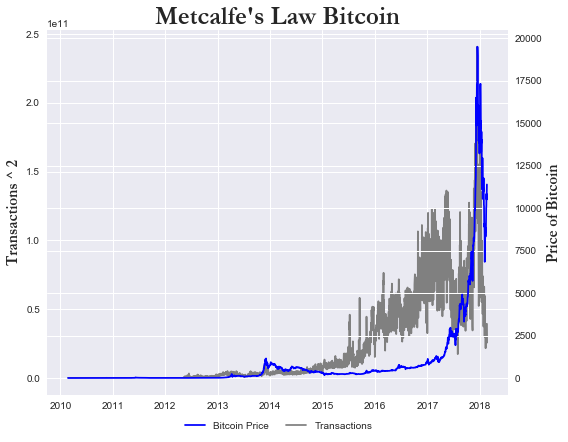

In [46]:
hfont = {'fontname':'Garamond'}

plt.style.use("seaborn")

fig, ax1 = plt.subplots()

ax1.plot(df.index, df["btc_n_transactions"]**2, label = "Transactions", color = "gray")

box = ax1.get_position()
ax1.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

ax1.set_ylabel("Transactions ^ 2", size = 15, fontweight='bold', **hfont)

ax2 = ax1.twinx()
ax2.plot(df.index, df["btc_market_price"], label = "Bitcoin Price", color = "blue")
ax2.set_ylabel("Price of Bitcoin", size = 15, fontweight='bold', **hfont)

box = ax2.get_position()
ax2.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])


ax1.legend(loc=2, bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=2)
ax2.legend(loc=0, bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=2)

plt.tight_layout()
plt.title("Metcalfe's Law Bitcoin", size = 25, fontweight='bold', **hfont)
plt.savefig("Metcalfe's Law Ethereum.png", facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()
    